In [1]:
import pandas as pd 
import numpy as np

## Creat imbalance data set 


In [2]:
# set the random seed for reproduciblity 

np.random.seed(123)

# cerate a two classes  with spcific no of data 

n_sample = 1000
n_class_o_ratio = 0.9
n_class_0 = int(n_sample*n_class_o_ratio)
n_class_1 =int(n_sample - n_class_0)

In [3]:
n_class_0 ,n_class_1

(900, 100)

In [4]:
## create Dataframe 
import pandas as pd
import numpy as np

# Assuming n_class_0 and n_class_1 are integers representing the size of the respective classes
#n_class_0 = 900  # actual size
#n_class_1 = 100  # actual size

# Create DataFrames
df_class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

df_class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})


In [5]:
# create data fram by combing of two dataframe

df = pd.concat([df_class_0, df_class_1]).reset_index(drop=True)


In [6]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [7]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [8]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

### Data is imbalanced :

- how Handle of imbalaced data set :
     1. upsampling = i.e increses the data point of lower category values by creating same datapoint  value of lower category datapoint (ex. in above dataset increses value count of target feature 1 by creating multiple target feature 1) 
     2. downsampling = i.e decreses the data point of maximum category values (ex. in above dataset decreses value count of target feature 0) 
     3. SMOTE =  increses the data point of lower category values between two lowercategory vlaue. by creating different datapoint value between lower category datapoints 
     4. interpolation = in thses method create a data piont in such way that crate a specif curve by ploting graph 

In [10]:
# seperate data points based on value_counts of target feature

df_minority = df[df['target']== 1]
df_majority = df[df['target'] == 0]



In [11]:
df_minority.head()

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1


In [12]:
df_majority.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [13]:
print(df_minority.shape)
print(df_majority.shape)

(100, 3)
(900, 3)


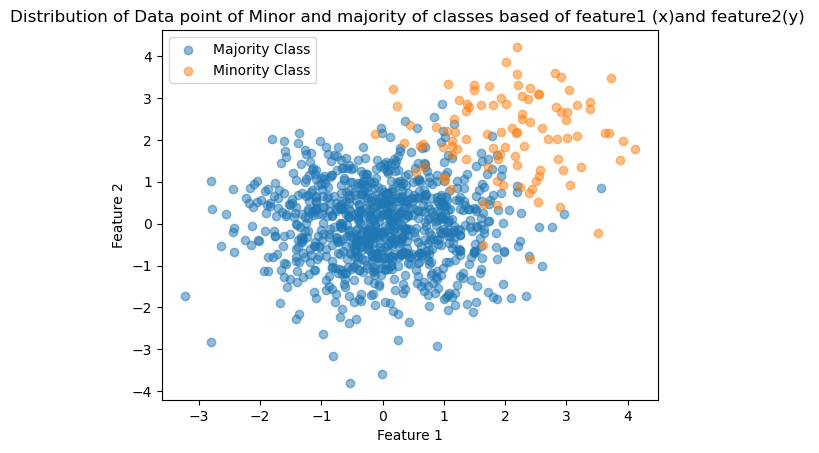

In [14]:
import matplotlib.pyplot as plt

# Scatter plot for the majority class based distribuution of target feature 1 and 0
plt.scatter(df_majority['feature_1'], df_majority['feature_2'], label='Majority Class', alpha=0.5)

# Scatter plot for the minority class  based distribuution of target feature 1 and 0
plt.scatter(df_minority['feature_1'], df_minority['feature_2'], label='Minority Class', alpha=0.5)

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Distribution of Data point of Minor and majority of classes based of feature1 (x)and feature2(y) ')
# Show the plot
plt.show()


## Upsampling

In [15]:
from sklearn . utils import resample

In [16]:
## conversion less value_count data point into high value count of target feature 1)

df_minority_upsample = resample(df_minority,
                               replace = True ,# sample with replacement 
                               n_samples = len(df_majority) , # to match the majority of class
                               random_state = 42)

In [17]:
df_minority_upsample.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [18]:
df_minority_upsample.shape

(900, 3)

In [19]:
# create 900 value counte of target feature 1 

df_minority_upsample['target'].value_counts()

1    900
Name: target, dtype: int64

In [20]:
# conctenate upsampled data ponit with normAL Data df that conatain both target featue 0 and 1

df_upsampled = pd.concat([df_majority ,df_minority_upsample])

In [21]:
df_upsampled.shape

(1800, 3)

In [22]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

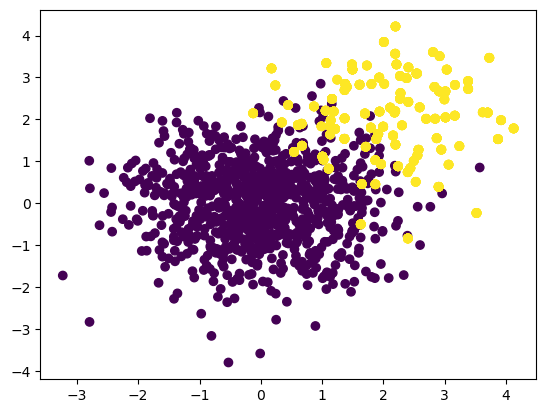

In [62]:
plt.scatter (df_upsampled['feature_1'] ,df_upsampled['feature_2'] , c= df_upsampled['target'])

In [23]:
# graphical represntation 

df_minority_upsampled = df_upsampled[df_upsampled['target']== 1]
df_majority_upsampled  = df_upsampled[df_upsampled['target'] == 0]


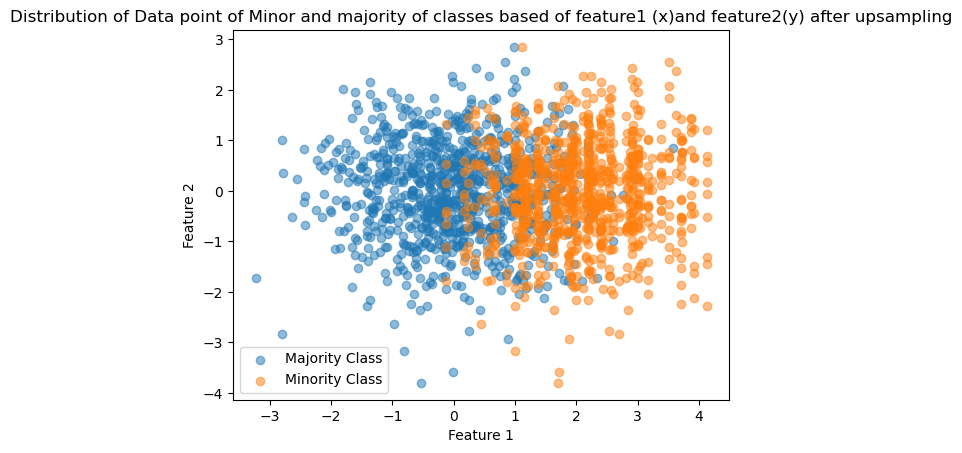

In [24]:
import matplotlib.pyplot as plt

# Scatter plot for the majority class based distribuution of target feature 1 and 0 after upscaling 
plt.scatter(df_majority_upsampled['feature_1'], df_majority_upsampled['feature_2'], label='Majority Class', alpha=0.5)

# Scatter plot for the minority class based distribuution of target feature 1 and 0 after upscaling 
plt.scatter(df_minority_upsampled['feature_1'], df_majority_upsampled['feature_2'], label='Minority Class', alpha=0.5)


# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Distribution of Data point of Minor and majority of classes based of feature1 (x)and feature2(y) after upsampling')

# Show the plot
plt.show()



## Downsampling

In [26]:
# Create DataFrames
df_class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

df_class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [27]:
# create data fram by combing of two dataframe

df = pd.concat([df_class_0, df_class_1]).reset_index(drop=True)


In [28]:
df.head()

,feature_1,feature_2,target
0,-1.774224,0.285744,0
1,-1.201377,0.333279,0
2,1.096257,0.531807,0
3,0.861037,-0.354766,0
4,-1.520367,-1.120815,0


In [29]:
df.tail()

,feature_1,feature_2,target
995,2.677156,1.092048,1
996,2.963404,0.181955,1
997,1.621476,1.877267,1
998,3.429559,3.794486,1
999,3.532273,1.679490,1


In [30]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [31]:
print(df_minority.shape)
print(df_majority.shape)

(100, 3)
(900, 3)


In [32]:
df_minority_downsample = resample(df_majority,
                               replace = False ,# sample without replacement 
                               n_samples = len(df_minority) , # to match the minority of class
                               random_state = 42)

In [33]:
df_minority_downsample.shape

(100, 3)

In [34]:
df_minority_downsample['target'].value_counts()

0    100
Name: target, dtype: int64

In [35]:
# conctenate downsampled data ponit with normAL Data df, concat data conatain both target featue 0 and 1

df_downsampled = pd.concat([df_minority_downsample , df_minority])


In [36]:
df_downsampled.shape

(200, 3)

In [37]:
df_downsampled['target'].value_counts()

0    100
1    100
Name: target, dtype: int64

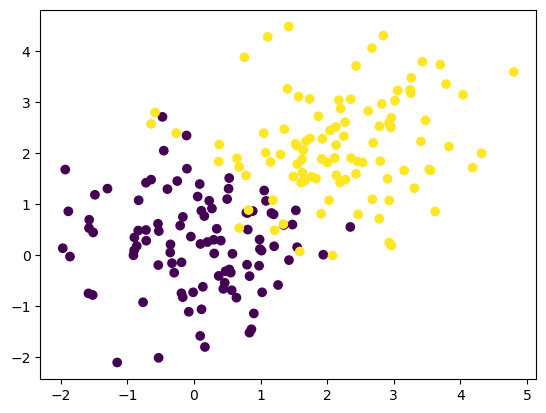

In [61]:
# graphical represntation . Method - 1

plt.scatter (df_downsampled['feature_1'] ,df_downsampled['feature_2'] , c= df_downsampled['target'])

In [38]:
# graphical represntation . Method - 2

df_minority_downsampled = df_downsampled[df_downsampled['target']== 1]
df_majority_downsampled  = df_downsampled[df_downsampled['target'] == 0]


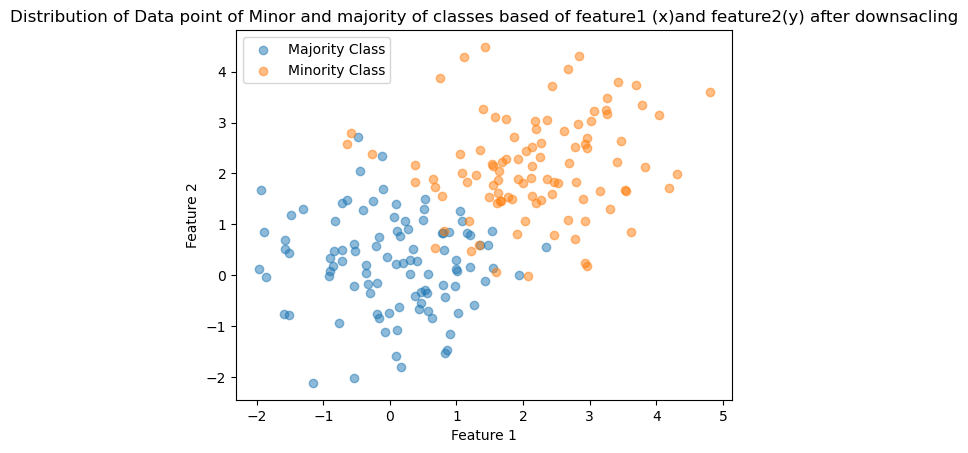

In [39]:
import matplotlib.pyplot as plt

# Scatter plot for the majority class based distribuution of target feature 1 and 0 after downsacling
plt.scatter(df_majority_downsampled['feature_1'], df_majority_downsampled['feature_2'], label='Majority Class', alpha=0.5)

# Scatter plot for the minority class based distribuution of target feature 1 and 0 after downscaling
plt.scatter(df_minority_downsampled['feature_1'], df_minority_downsampled['feature_2'], label='Minority Class', alpha=0.5)


# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Distribution of Data point of Minor and majority of classes based of feature1 (x)and feature2(y) after downsacling')

# Show the plot
plt.show()



## SMOTE = Synthetic Minority Over sampling Technique

In [41]:
from sklearn.datasets import make_classification


###### create  imbalnce  dataset

In [51]:
## create Dataset 

# x = independent variable 
# y = dependent variable


# Create synthetic classification dataset

x, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,  # No relationship between x and y
    n_clusters_per_class=1,
    weights=[0.90],  # One category of data 90% and category 2 = 10%
    random_state=2
)

print(x, y)

[[-2.14034004  0.56244104]
 [-0.51971882 -1.93226787]
 [-0.79463847  1.77543075]
 ...
 [-0.35581385  2.23485679]
 [-1.99824143  2.72959907]
 [-1.9134834   1.14576409]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 

In [55]:
#create Dataframe

import pandas as pd

df1 = pd.DataFrame(x, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

df = pd.concat([df1, df2], axis=1)
df.head()

,f1,f2,target
0,-2.140340,0.562441,0
1,-0.519719,-1.932268,0
2,-0.794638,1.775431,0
3,0.223479,2.096700,0
4,-1.332802,0.637973,0


In [70]:
df['target'].value_counts()

0    897
1    103
Name: target, dtype: int64

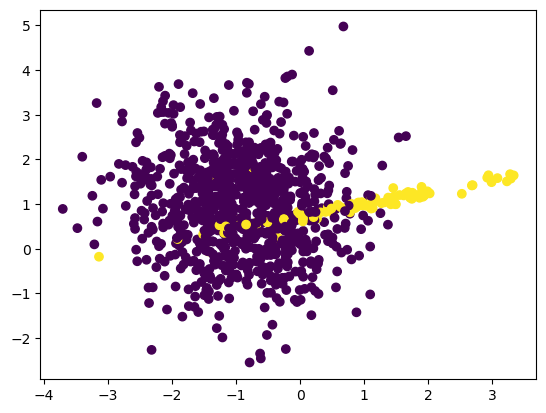

In [71]:
import matplotlib.pyplot as plt

plt.scatter (df['f1'] ,df['f2'] , c= df['target'])

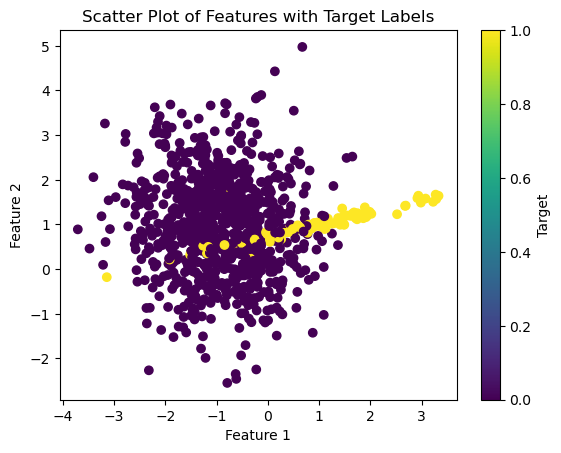

In [72]:
import matplotlib.pyplot as plt

plt.scatter(df['f1'], df['f2'], c=df['target'], cmap='viridis')  # You can choose a different colormap if desired
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Features with Target Labels')
plt.colorbar(label='Target')  # Add colorbar with label
plt.show()


In [73]:
df_majority = df[df['target']==0]
df_minority = df[df['target']==1]

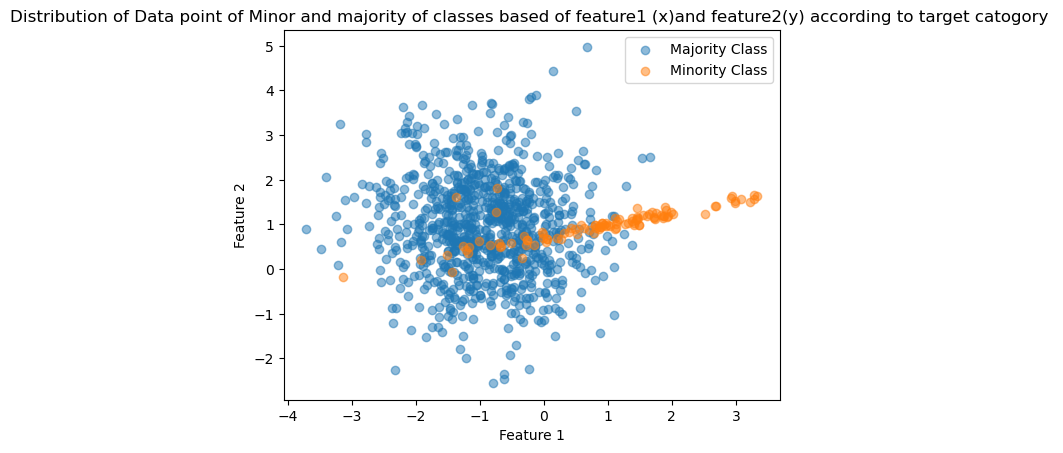

In [76]:
import matplotlib.pyplot as plt

# Scatter plot for the majority class based distribuution of target feature 1 and 0
plt.scatter(df_majority['f1'], df_majority['f2'], label='Majority Class', alpha=0.5)

# Scatter plot for the minority class  based distribuution of target feature 1 and 0
plt.scatter(df_minority['f1'], df_minority['f2'], label='Minority Class', alpha=0.5)

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Distribution of Data point of Minor and majority of classes based of feature1 (x)and feature2(y) according to target catogory ')
# Show the plot
plt.show()


##### apply SMOT 

In [79]:
! pip install imblearn

In [81]:
from imblearn.over_sampling import SMOTE

In [84]:
# transform Dataset 

oversample = SMOTE()
x,y = oversample.fit_resample(df[['f1','f2']],df['target'])

In [85]:
print (x,y)

            f1        f2
0    -2.140340  0.562441
1    -0.519719 -1.932268
2    -0.794638  1.775431
3     0.223479  2.096700
4    -1.332802  0.637973
...        ...       ...
1789  1.901320  1.167958
1790  1.187375  1.014103
1791  0.799971  0.970920
1792  0.369922  0.806841
1793  3.211586  1.514684

[1794 rows x 2 columns] 0       0
1       0
2       0
3       0
4       0
       ..
1789    1
1790    1
1791    1
1792    1
1793    1
Name: target, Length: 1794, dtype: int32


In [86]:
print(x.shape)
print(y.shape)

(1794, 2)
(1794,)


In [99]:

import pandas as pd

df1 = pd.DataFrame(x, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

df_SWOTE = pd.concat([df1, df2], axis=1)

df.head()

,f1,f2,target
0,-2.140340,0.562441,0
1,-0.519719,-1.932268,0
2,-0.794638,1.775431,0
3,0.223479,2.096700,0
4,-1.332802,0.637973,0


In [100]:
df_SWOTE.shape

(1794, 3)

In [101]:
df_SWOTE['target'].value_counts()

0    897
1    897
Name: target, dtype: int64

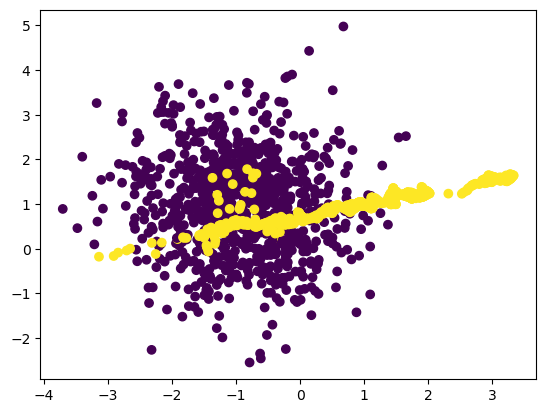

In [102]:
import matplotlib.pyplot as plt

# method-1 

plt.scatter (df_SWOTE['f1'] ,df_SWOTE['f2'] , c= df_SWOTE['target'])

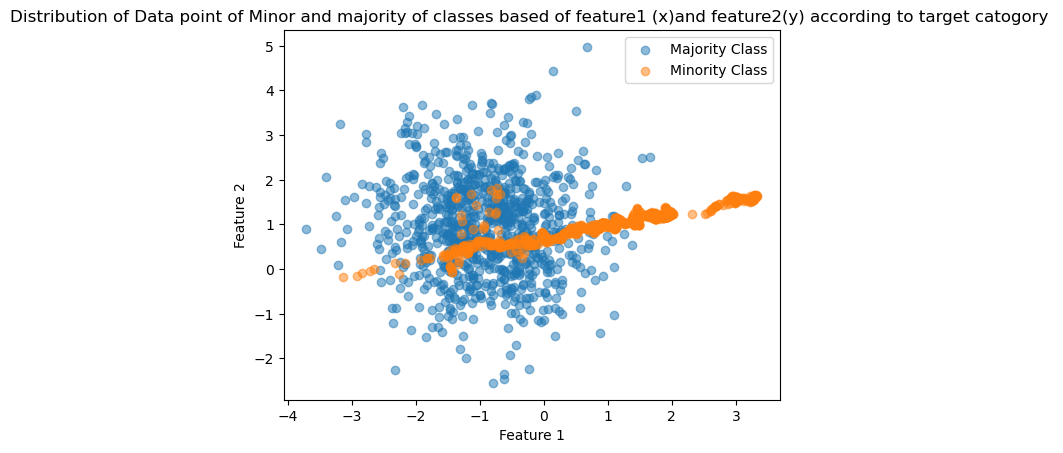

In [103]:
# method -2 

df_SWOTE_Majority = df_SWOTE[df_SWOTE['target'] == 0]
df_SWOTE_Minority = df_SWOTE[df_SWOTE['target']== 1 ]

# Scatter plot for the majority class based distribuution of target feature 1 and 0
plt.scatter(df_SWOTE_Majority['f1'], df_SWOTE_Majority['f2'], label='Majority Class', alpha=0.5)

# Scatter plot for the minority class  based distribuution of target feature 1 and 0
plt.scatter(df_SWOTE_Minority['f1'], df_SWOTE_Minority['f2'], label='Minority Class', alpha=0.5)

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Distribution of Data point of Minor and majority of classes based of feature1 (x)and feature2(y) according to target catogory ')
# Show the plot
plt.show()


## Interpolation 

#### 1.Linear Interpolation

- The np.interp function in NumPy is used for linear interpolation.
- Linear interpolation is a method of estimating values that fall between known values in a set of data.

- Here's the basic syntax:
      - numpy.interp(x, xp, fp, left=None, right=None, period=None)

  - x: The x-coordinates where you want to interpolate values.
  - xp: The x-coordinates of the data points (must be in increasing order).
  - fp: The y-coordinates of the data points.
  - left (optional): The value to return for x values below the first element of xp. Default is fp[0].
  - right (optional): The value to return for x values above the last element of xp. Default is fp[-1].
  - period (optional): If given, xp is assumed to be periodic with the specified period. This can be used to interpolate values at angles beyond 360 degrees.

In [110]:
import numpy as np 

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([2,4,6,8,10,12,14,16,18,20])

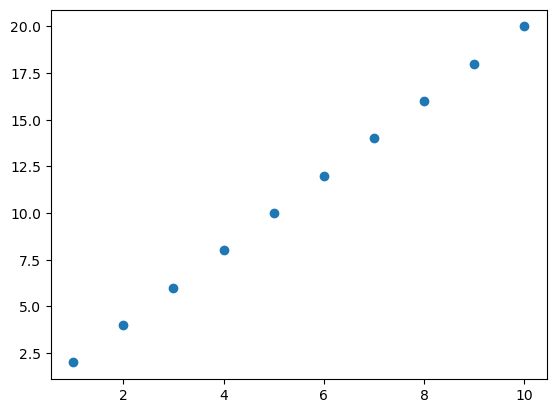

In [111]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

In [121]:
## interpolate the data  using linear iterpolation

x_new = np.linspace(1,6,20)     # create new X value
y_interp = np.interp(x_new ,x,y)    # interpolate y value 

In [123]:
print(x_new ,'--------' ,y_interp)

[1.         1.26315789 1.52631579 1.78947368 2.05263158 2.31578947
 2.57894737 2.84210526 3.10526316 3.36842105 3.63157895 3.89473684
 4.15789474 4.42105263 4.68421053 4.94736842 5.21052632 5.47368421
 5.73684211 6.        ] -------- [ 2.          2.52631579  3.05263158  3.57894737  4.10526316  4.63157895
  5.15789474  5.68421053  6.21052632  6.73684211  7.26315789  7.78947368
  8.31578947  8.84210526  9.36842105  9.89473684 10.42105263 10.94736842
 11.47368421 12.        ]


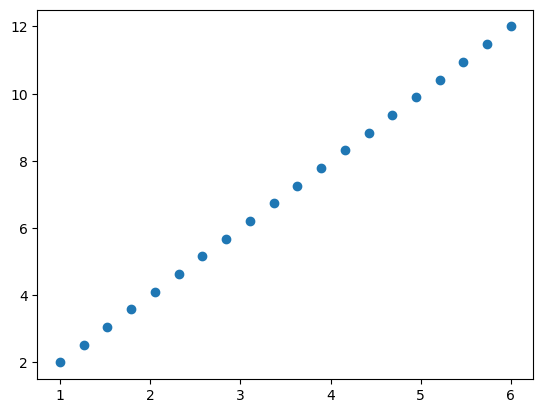

In [122]:
import matplotlib.pyplot as plt

plt.scatter(x_new,y_interp)

### 2. Cubic interploation With Sicpy 

###### interp1d() function :
- The interp1d function is part of the scipy.interpolate module and is used for one-dimensional interpolation. This function is more versatile than numpy.interp as it supports various interpolation methods beyond linear interpolation.

### syntax = 
 interp1d(
    x,
    y,
    kind='linear',
    axis=-1,
    copy=True,
    bounds_error=None,
    fill_value=nan,
    assume_sorted=False,)


Docstring:     
Interpolate a 1-D function.


Parameters
---------
> -  x : (N,) array_like
    A 1-D array of real values.
> -  y : (...,N,...) array_like
    A N-D array of real values. The length of `y` along the interpolation
    axis must be equal to the length of `x`.
> - kind : str or int, optional
    Specifies the kind of interpolation as a string or as an integer
    specifying the order of the spline interpolator to use.
    The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
    'slinear', 'quadratic', 'cubic', 'previous', or 'next'. 'zero',
    'slinear', 'quadratic' and 'cubic' refer to a spline interpolation of
    zeroth, first, second or third order; 'previous' and 'next' simply
    return the previous or next value of the point; 'nearest-up' and
    'nearest' differ when interpolating half-integers (e.g. 0.5, 1.5)
    in that 'nearest-up' rounds up and 'nearest' rounds down. Default
    is 'linear'.
> - axis : int, optional
    Specifies the axis of `y` along which to interpolate.
    Interpolation defaults to the last axis of `y`.  

<pr >Docstring:     
Interpolate a 1-D function.<pr >


In [144]:
from scipy .interpolate import interp1d

In [125]:
import numpy as np 

In [133]:
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125,])

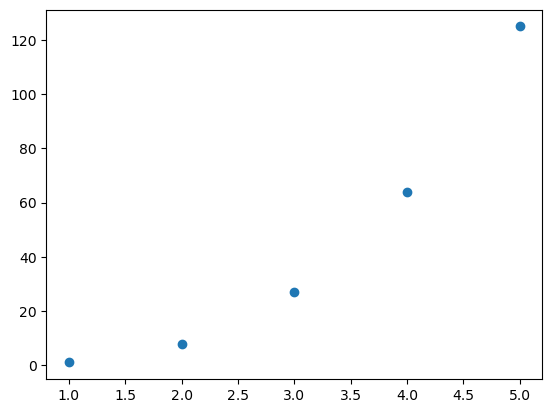

In [134]:
import matplotlib.pyplot as plt 

plt.scatter(x,y)

In [135]:
# create interpolation  function 

from scipy .interpolate import interp1d



In [137]:
f = interp1d (x,y,kind = 'cubic')

In [141]:
## interploate the data 

x_new = np.linspace(1,5,20)
y_interp = f(x_new)

In [142]:
print(x_new ,'--------' ,y_interp)

[1.         1.21052632 1.42105263 1.63157895 1.84210526 2.05263158
 2.26315789 2.47368421 2.68421053 2.89473684 3.10526316 3.31578947
 3.52631579 3.73684211 3.94736842 4.15789474 4.36842105 4.57894737
 4.78947368 5.        ] -------- [  1.           1.77387374   2.8696603    4.34334451   6.25091121
   8.64834524  11.59163143  15.13675463  19.33969966  24.25645138
  29.94299461  36.45531419  43.84939496  52.18122175  61.50677941
  71.88205278  83.36302668  96.00568596 109.86601545 125.        ]


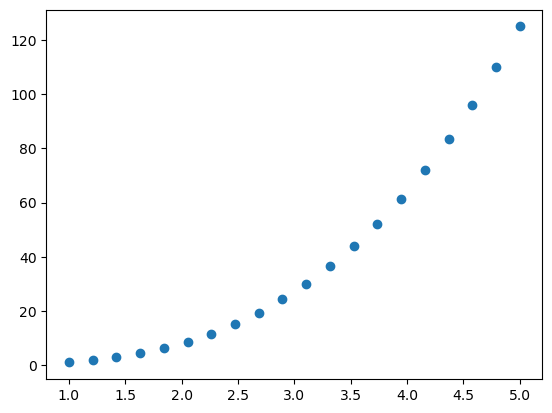

In [143]:
plt.scatter(x_new ,y_interp)

### 3. Polynominal Interpolation 

In [168]:
# create sample data 

x = np.array([1,2,3,4,5,8,12,14,19])
y = np.array([1,4,9,16,25,30,43,56,60])


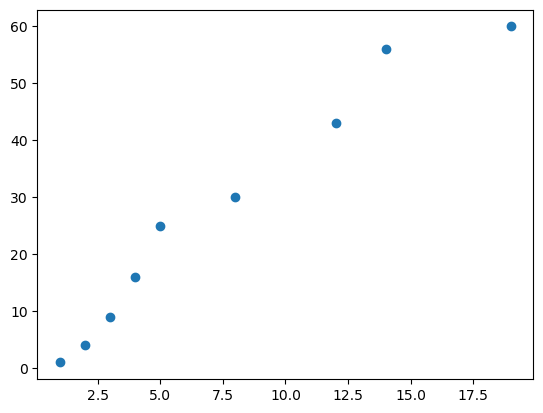

In [169]:
plt.scatter(x,y)

In [179]:
# interploate the data  using ploynomial interploation 

p = np.polyfit(x,y,6)  # fit a 2 degree of polynomial to data 

In [180]:
x_new = np.linspace (1,5,20 )    # create new x value data points 

y_interp = np.polyval(p ,x_new)       # interpolate y values 

In [158]:
print(x_new ,'--------',y_interp)

[1.         1.21052632 1.42105263 1.63157895 1.84210526 2.05263158
 2.26315789 2.47368421 2.68421053 2.89473684 3.10526316 3.31578947
 3.52631579 3.73684211 3.94736842 4.15789474 4.36842105 4.57894737
 4.78947368 5.        ] -------- [1.68571429 1.7401662  1.80728136 1.88705975 1.97950139 2.08460625
 2.20237436 2.3328057  2.47590028 2.63165809 2.80007915 2.98116343
 3.17491096 3.38132173 3.60039573 3.83213296 4.07653344 4.33359715
 4.6033241  4.88571429]


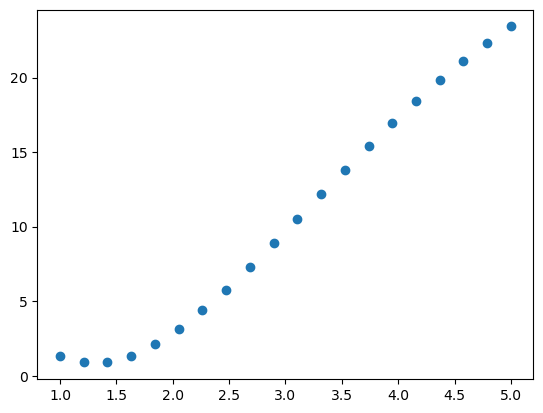

In [181]:
plt.scatter(x_new , y_interp)